In [1]:
import numpy as np

import msprime

import sys
sys.path.append('../src/')
import util

from IPython import display


In [2]:
ts = msprime.sim_mutations(
    msprime.sim_ancestry(
        5,
        sequence_length=100,
        random_seed=1234
    ),
    rate=1e-2,
    random_seed=1234
)
ts


In [3]:
# Examples of four different types of paths.
paths = np.array([
    [2, 2, 2, 2, 2, 2], # 0 switch
    [2, 2, 0, 0, 0, 0], # 1 switch
    [2, 2, 0, 0, 1, 1], # 2 switches
    [15, 15, 0, 18, 6, 6],  # 3 switches
], dtype=np.int32)

# Add the individuals
new_ts_1 = util.add_individuals_to_tree_sequence(
    ts,
    paths=paths,
    individual_names=["test_1", "test_2"],
)

# Add another triploid individual (the same one)
new_ts_2 = util.add_individuals_to_tree_sequence(
    new_ts_1,
    paths=paths,
    individual_names=["test_3", "test_4"],
)


100%|██████████| 2/2 [00:00<00:00, 2320.50it/s]


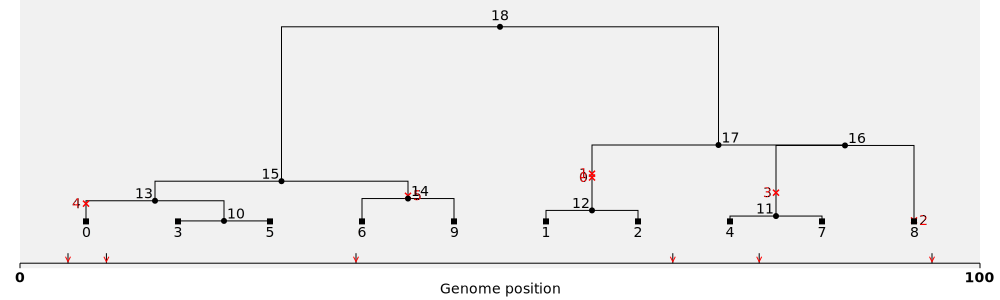

In [4]:
display.display(ts.draw_svg(size=(1_000, 300)))


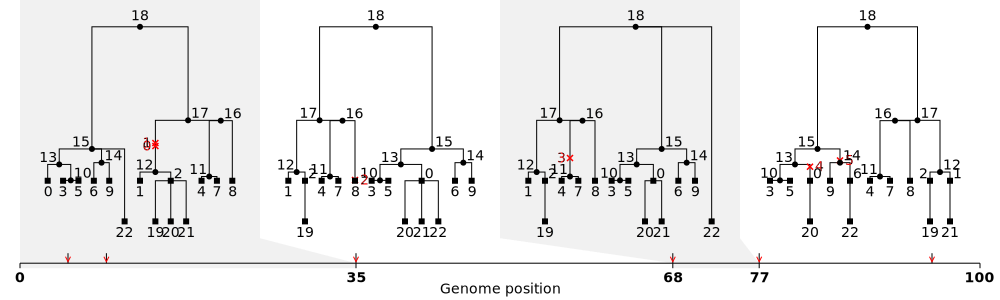

In [5]:
display.display(new_ts_1.draw_svg(size=(1_000, 300)))


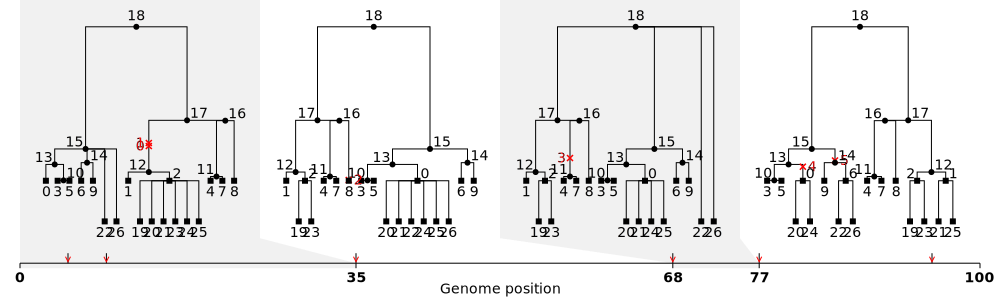

In [6]:
display.display(new_ts_2.draw_svg(size=(1_000, 300)))


In [7]:
new_ts_1.tables.sites


id,position,ancestral_state,metadata
0,5,T,
1,9,T,
2,35,C,
3,68,G,
4,77,A,
5,95,C,


In [8]:
new_ts_1.tables.mutations


id,site,node,time,derived_state,parent,metadata
0,0,12,0.85429667,A,-1,
1,1,12,0.92826372,A,-1,
2,2,8,0.01907886,T,-1,
3,3,11,0.55888925,T,-1,
4,4,0,0.34570619,T,-1,
5,5,14,0.49844347,A,-1,


In [9]:
new_ts_1.tables.edges


id,left,right,parent,child,metadata
0,35,100,0,20,
1,35,77,0,21,
2,35,68,0,22,
3,77,100,1,21,
4,0,100,2,19,
5,0,35,2,20,
6,0,35,2,21,
7,77,100,6,22,
8,0,100,10,3,
9,0,100,10,5,


In [10]:
with open("test_1.vcf", "w") as f:
    new_ts_1.write_vcf(
        f,
        contig_id="20",
        individuals=np.arange(
            ts.num_individuals,
            new_ts_1.num_individuals
        ),
        individual_names=["test_1", "test_2"]
    )


In [11]:
# The above gives this.
###fileformat=VCFv4.2
###source=tskit 0.5.5
###FILTER=<ID=PASS,Description="All filters passed">
###contig=<ID=20,length=100>
###FORMAT=<ID=GT,Number=1,Type=String,Description="Genotype">
##CHROM  POS     ID      REF     ALT     QUAL    FILTER  INFO    FORMAT  test_1  test_2
#20      5       0       T       A       .       PASS    .       GT      1|1     1|0
#20      9       1       T       A       .       PASS    .       GT      1|1     1|0
#20      35      2       C       T       .       PASS    .       GT      0|0     0|0
#20      68      3       G       T       .       PASS    .       GT      0|0     0|0
#20      77      4       A       T       .       PASS    .       GT      0|1     0|0
#20      95      5       C       A       .       PASS    .       GT      0|0     0|1


In [12]:
with open("test_2.vcf", "w") as f:
    new_ts_2.write_vcf(
        f,
        contig_id="20",
        individuals=np.arange(
            ts.num_individuals,
            new_ts_2.num_individuals
        ),
        individual_names=["test" + "_" + str(i) for i in np.arange(4)]
    )


In [13]:
# The above gives this.
###fileformat=VCFv4.2
###source=tskit 0.5.5
###FILTER=<ID=PASS,Description="All filters passed">
###contig=<ID=20,length=100>
###FORMAT=<ID=GT,Number=1,Type=String,Description="Genotype">
##CHROM  POS     ID      REF     ALT     QUAL    FILTER  INFO    FORMAT  test_0  test_1  test_2  test_3
#20      5       0       T       A       .       PASS    .       GT      1|1     1|0     1|1     1|0
#20      9       1       T       A       .       PASS    .       GT      1|1     1|0     1|1     1|0
#20      35      2       C       T       .       PASS    .       GT      0|0     0|0     0|0     0|0
#20      68      3       G       T       .       PASS    .       GT      0|0     0|0     0|0     0|0
#20      77      4       A       T       .       PASS    .       GT      0|1     0|0     0|1     0|0
#20      95      5       C       A       .       PASS    .       GT      0|0     0|1     0|0     0|1
